# Data Visualization with Haberman Dataset

* Haberman Dataset 
* Contains data about Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer 
* Features of the dataset:
    * age - Age at which undergone surgery
    * year - year in which patient underwent surgery (1958 to 1970)
    * nodes - axillary nodes detected (0-52)
* Classes:
    * 1 - if patients survived 5 years or more status is represented as 1 
    * 2 - patients who survived less than 5 years status is represented as 2.
* Objective: Classify a new patient's survival belonging to classes(1,2) using the three features(age,nodes,year)

In [101]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [102]:
#loading data
haberman=pd.read_csv('haberman.csv')

In [103]:
#tells the number of datapoints and the number of columns
print(haberman.shape)

(306, 4)


In [104]:
#different columns
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [105]:
#number of datapoints of each class
print(haberman['status'].value_counts())
print(haberman.describe())


1    225
2     81
Name: status, dtype: int64
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


* Observations:
    * The dataset has two categories 1(describes longer survival) and 2(describes shorter survival)
    * The dataset is imbalanced,74% people lived longer and rest had a short span.
    * age varies from 30 to 83 with mean age to be 52.
    * standard deviation says that feature year had comparivetly shorter spread.
    * 25%,50%,75% says :
        * most people were aged between 45-60
        * most operations occured in the year between 1960-1965
        * Most patients who survived less than or greater than 5 years had nodes between 0 to 4
    
    

In [106]:
 #Check for missing values
haberman.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

* Obs:
    * Dataset has no missing values hence there is no need for imputing data for handling missing data.
    

###  Bivariate analysis 
    

#### 2D Scatter plot

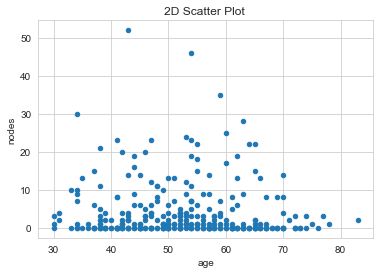

In [107]:
haberman.plot(kind='scatter',x='age',y='nodes')
plt.title('2D Scatter Plot ')
plt.show()

Text(0.5, 0.98, '2D Scatter Plot ')

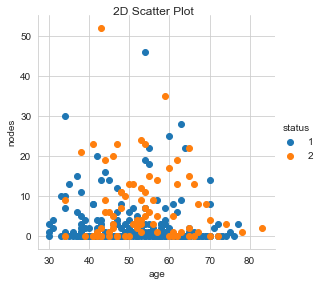

In [108]:
#using sns for scatter plot we will be able to differentiate points between two classes
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=4).map(plt.scatter,'age','nodes').add_legend()
plt.suptitle('2D Scatter Plot ')

<H4>3D SCATTER PLOT</H4>

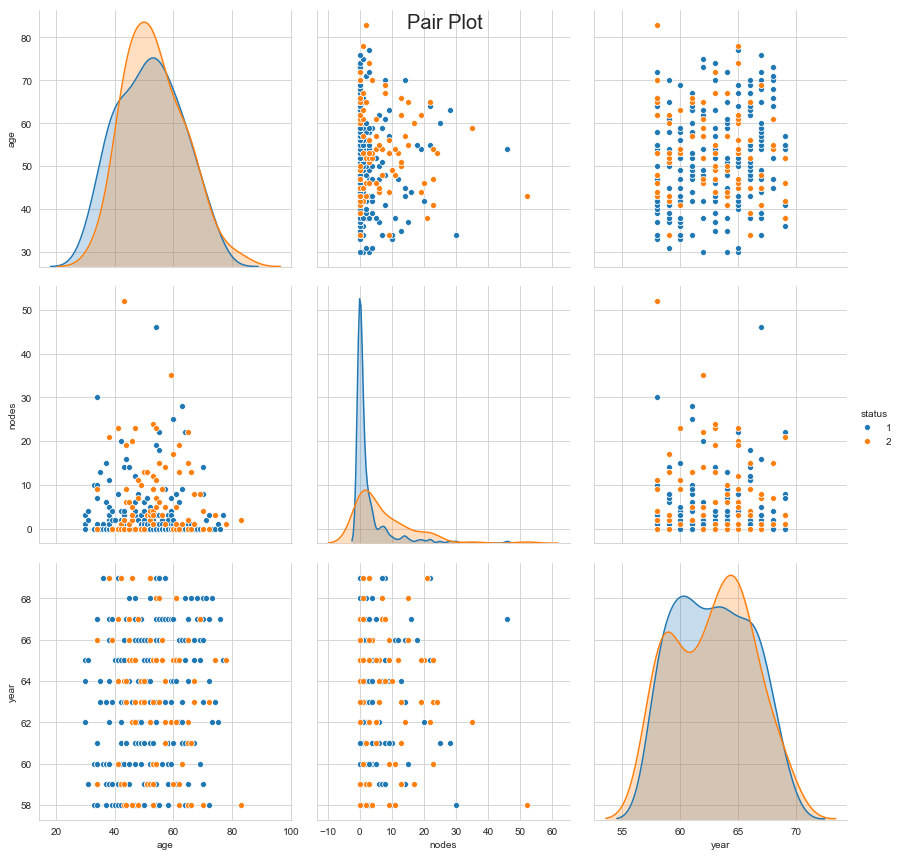

In [109]:
#PAIR PLOT
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue="status",height=4,vars=['age','nodes','year'])
plt.suptitle('Pair Plot',size=20)
plt.show()


* Observations:
    * All the above pairplots has overlaps,so we cannot clearly distingish/classify between the classes.
    * From the above pair plots we can see that the combination of features (nodes,age) comparetively distingusihes the classes  better compared to other combinations.

<h4> 1D Scatter Plot </h4>

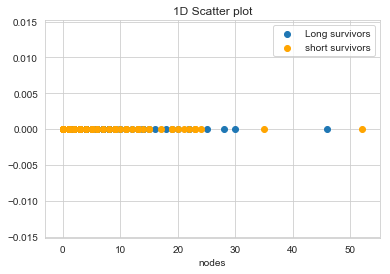

In [123]:
status_1=haberman[haberman['status'] == 1]
status_2=haberman[haberman['status'] == 2]
plt.scatter(status_1['nodes'],np.zeros_like(status_1['nodes']),label='Long survivors',marker='o')
plt.scatter(status_2['nodes'],np.zeros_like(status_2['nodes']),label='short survivors',color='orange')
plt.title('1D Scatter plot')
plt.legend()
plt.xlabel('nodes')
plt.show()

In [111]:
#since all the data here are overlapping ,we can use PDF and CDF to better understand the data

<h4>Univariate Analysis</h4>

In [112]:
# lets draw PDF using each freature

<h5>PDF of Nodes </h5>


Text(10.462421875, 0.5, 'PDF')

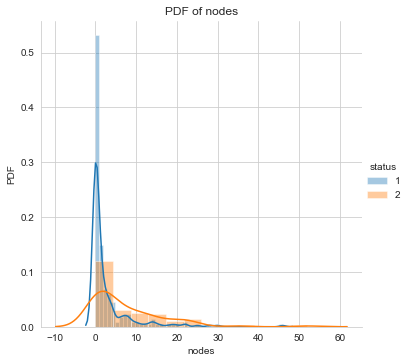

In [113]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.title('PDF of nodes')
plt.ylabel('PDF')

 * Observation:
     * We can see that lesser the number of nodes the chance of survival is more.
     * From the above histogram its still hard to classify but it is the best data we can choose among the others.
     * We still do not know the percentage of people who will survive for longer than 5 years or vice versa

<h5>PDF of year</h5>


Text(12.191015625, 0.5, 'PDF')

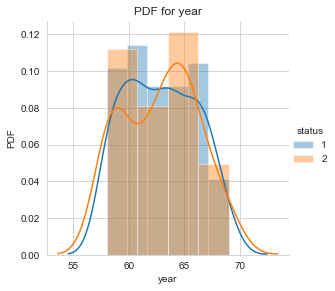

In [124]:
sns.FacetGrid(haberman,hue='status',height=4).map(sns.distplot,'year').add_legend()
plt.title('PDF for year')
plt.ylabel('PDF')

* Observations:
    * Clearly there is alot of overlap between the class when we try  to classify the data.
    * But we can find that between year 60-65 many had a shorter span(<5 years) to live.
    * This feature can be rejected to classify as it has a lot of overlap.

##### PDF for age

Text(12.9678710938, 0.5, 'PDF')

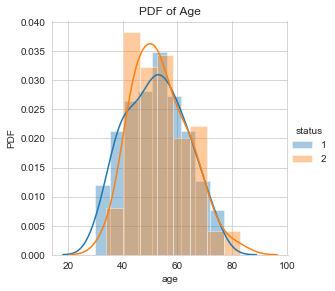

In [115]:
sns.FacetGrid(haberman,hue='status',height=4).map(sns.distplot,'age').add_legend()
plt.title('PDF of Age')
plt.ylabel('PDF')

* Observations:
    * Here also both the classes are very much overlapping 
    * We can see that comparitively there are more population of people aged between 40-60 who had short span(<5years).
    * out of all the three PDF we can consider the feature-Nodes as it comparitively classifies better than the rest.

#### CDF for longer survival And Short survival

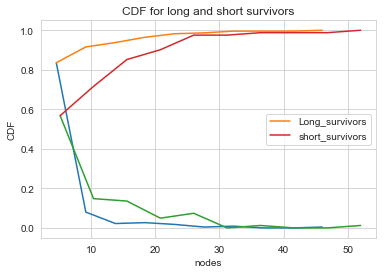

In [116]:
#calculating cdf for long survivors
counts,bin_edges=np.histogram(status_1['nodes'],bins=10,density=True) 
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label='Long_survivors')
plt.xlabel('nodes')
#calculating cdf for short survivors
counts,bin_edges=np.histogram(status_2['nodes'],bins=10,density=True) 
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label='short_survivors')
plt.xlabel('nodes')
plt.ylabel('CDF')
plt.title('CDF for long and short survivors')
plt.legend()
plt.show()

* Observations for long Survivors
    * We can see that about 85% chances of survival for people having nodes<5.
    *  patient is most likely to  not survive if node>40
    * As the number of nodes increases chances of survival decreases
    * number of nodes is inversely propotional to chances of surviving
* Observations for short survivors:
    * There are just 55% of short survival people who have nodes less than 5 
    * People with increasing number of nodes are less likely to survive
    * Compared to people with status as 1 (long survivors) there are more number of people with   nodes>40 with status 2 (short surviors) .Which makes clear that people with nodes >40 are most likely to have a short span    

##### Standarad Deviation and Mean


In [117]:
#Mean for Long survivors
print('-----Mean for long survivors-------')
print(np.mean(status_1['nodes']))
#Mean with outliers
print('---with outlier---')
print(np.mean(np.append(status_1['nodes'],50)))

#mean for short surviors
print('-----Mean for short survivors-------')
print(np.mean(status_2['nodes']))
#Mean with outliers
print('---with outlier---')
print(np.mean(np.append(status_2['nodes'],50)))

# standard deviaition of long survivors
print('------STD for long survivors--------')
print(np.std(status_1['nodes']))
# standard deviaition of short survivors
print('------STD for short survivors--------')
print(np.std(status_2['nodes']))


-----Mean for long survivors-------
2.7911111111111113
---with outlier---
3.0
-----Mean for short survivors-------
7.45679012345679
---with outlier---
7.9756097561
------STD for long survivors--------
5.857258449412131
------STD for short survivors--------
9.128776076761632


* Observation
    * we can see that the sort survival data is more spread than the long survival data
    * the avegarge number of nodes of short survived people is  2.5 *approx(7.45/2.79) times more than the long survived people, this tells us that people survived for short span on an average had more number of nodes compared to the people who survived for a longer period.
 

#### Median,Quantiles,Percentiles

In [118]:
# calculating median for Long and short survivors
print('-------Median for Long Survivors-------')
print(np.median(status_1['nodes']))
print('-------Median for Short Survivors-------')
print(np.median(status_2['nodes']))

#calculating Quantile for long and short survivors
print('-------quantile for Long Survivors-------')
print(np.percentile(status_1['nodes'],[25,50,75]))
print('-------quantile for Short Survivors-------')
print(np.percentile(status_2['nodes'],[25,50,75]))

print('''--------90th percentile for long survivors''')
print(np.percentile(status_1['nodes'],90))
print('''--------90th percentile for long survivors''')
print(np.percentile(status_2['nodes'],90))

#Median Abosolute deviation
print('--Median aboslute deviation of long survivors--')
from statsmodels import robust
print(robust.mad(status_1['status']))
print('--Median aboslute deviation of short survivors--')
print(robust.mad(status_2['status']))

-------Median for Long Survivors-------
0.0
-------Median for Short Survivors-------
4.0
-------quantile for Long Survivors-------
[ 0.  0.  3.]
-------quantile for Short Survivors-------
[  1.   4.  11.]
--------90th percentile for long survivors
8.0
--------90th percentile for long survivors
20.0
--Median aboslute deviation of long survivors--
0.0
--Median aboslute deviation of short survivors--
0.0


* Observations
    * Average number of nodes for people who survived longer was 0 and people who survived shorter was 4.
    * 50% people survived longer had 0 nodes and 75th% of people(i.e 25% of people) had nodes <= 3 
    * 50% people survived shorter had nodes <=4 and 75th% of people(i.e 25% of people) had nodes <=11
    * (90% of short survivors had nodes<=20) which is 2x(approx) times more than (90% of long survivors who had nodes<=8 only)

#### BOX PLOT with Whiskers

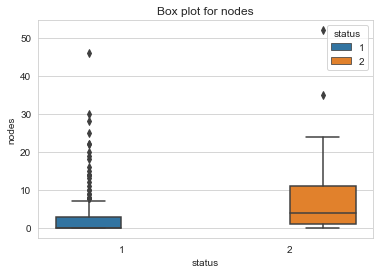

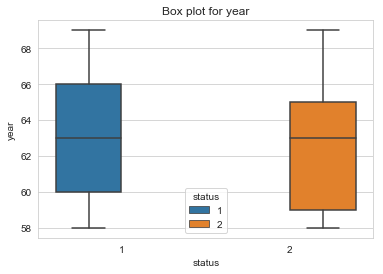

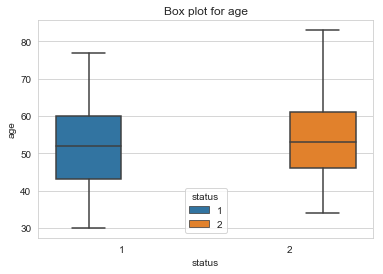

In [119]:
sns.boxplot(data=haberman,x='status',y='nodes',hue='status')
plt.title('Box plot for nodes')
plt.show()
sns.boxplot(data=haberman,x='status',y='year',hue='status')
plt.title('Box plot for year')
plt.show()
sns.boxplot(data=haberman,x='status',y='age',hue='status')
plt.title('Box plot for age')
plt.show()

* Observations:
    * The orange plot repesents short survivors and the blue represents long survivors.
    * The T shape in the plot is the whiskers representing the highest and the lowest datapoints.
    * The dot outside the box are outliers(the points that have a very large value or  very small value and have a very high variance)
    * People aged between 45-50 were more who lived for a short span.
    * From the plot above we can see that 25th and 75th percentile for the long survivors are the same (i.e 0).Overall range is 0-7
    * for the short survivors the 25th percentile is 2 and 75th is 12.Overall range is 0-25
    * There are chances of error (60% approx) that the short survivors get misclassified as long survivors.
    * Also there are chances that all the long survivors get misclassified as short survivors.
    

#### Violin Plot

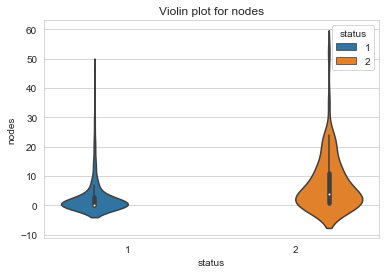

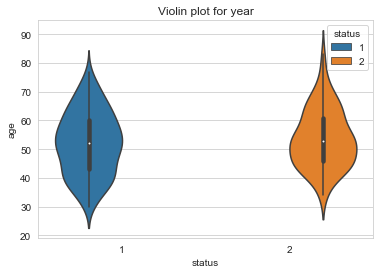

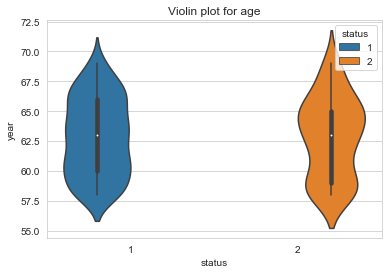

In [120]:
sns.violinplot(data=haberman,x='status',y='nodes',hue='status')
plt.title('Violin plot for nodes')
plt.show()
sns.violinplot(data=haberman,x='status',y='age',hue='status')
plt.title('Violin plot for year')
plt.show()
sns.violinplot(data=haberman,x='status',y='year',hue='status')
plt.title('Violin plot for age')
plt.show()

* Observation:
    * Violin plots is a combination of PDF and boxplots.
    * For the long survivors we can see that the density of nodes  is on the 0th range.And for short survivors
      density is more from 0-20.Also the whiskers of the box plot mostly lie where the density of data is good and closer to mean/median, thereby  identifying outliers.
    * it is also seen from the feature year,people treated after the year 1966 were more to survive.  

#### Mutlivariate analysis:(Contour Plots)

Text(0.5, 1.01, 'Contour plot for Long survivors')

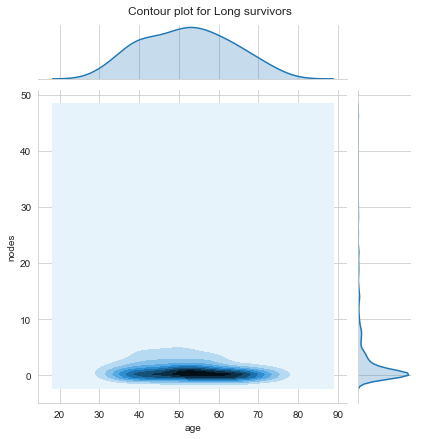

In [121]:
sns.jointplot(x='age',y='nodes',data=status_1,kind='kde')
plt.suptitle('Contour plot for Long survivors', size=12, y=1.01)  

* Obseravtions:
    * We can see that density of the contour(darker) for long survivors is more between the age range(45-60)
      and the nodes are varying from 0 to 2 approx.

Text(0.5, 1.01, 'Contour plot for Short survivors')

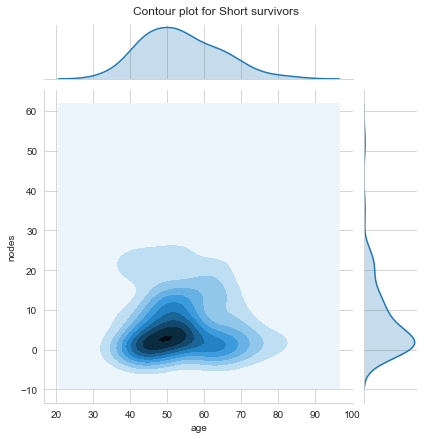

In [122]:
sns.jointplot(x='age',y='nodes',data=status_2,kind='kde')
plt.suptitle('Contour plot for Short survivors', size=12, y=1.01)

* Observations:
    * the  dense area (darker) in the contour shows most people who survived for short span were in the age between 40-55 (approx) and the number of nodes were between 0-5(approx)
    

References:
    dataset info: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival
    box Plots:https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51